# European Develompent Indicators - Iceland

## Research Questions

1. How has Iceland's GDP growth correlated with inflation rates over the past 20 years?

2. What is the relationship between educational attainment and unemployment in Iceland?

3. What is the gender wage gap trend in Iceland, and how does it compare with female employment rates?

## Datasets

* [namq_10_gdp](https://doi.org/10.2908/NAMQ_10_GDP) - Eurostat: Quarterly GDP

* [nama_10_co3_p3](https://doi.org/10.2908/NAMA_10_CO3_P3) - Eurostat: Annual household disposable income

* [tec00001](https://doi.org/10.2908/TEC00001) - Eurostat: Annual GDP at market prices

* [prc_hicp_midx](https://doi.org/10.2908/PRC_HICP_MIDX) - Eurostat: Monthly Harmonized CPI

* [prc_hicp_manr](https://doi.org/10.2908/PRC_HICP_MANR) - Eurostat: Monthly CPI inflation rate

* [prc_hicp_inw](https://doi.org/10.2908/PRC_HICP_INW) - Eurostat: Annual CPI inflation rate by income group

* [lfsa_urgaed](https://doi.org/10.2908/LFSA_URGAED) - Eurostat: Annual unemployment rate by education level

* [lfsa_egaed](https://doi.org/10.2908/LFSA_EGAED) - Eurostat: Annual employment rate by education level

* [lfsa_egised](https://doi.org/10.2908/LFSA_EGISED) - Eurostat: Annual employed persons by occupation and educational attainment level

* [lfsa_egan](https://doi.org/10.2908/LFSA_EGAN) - Eurostat: Annual employment

* [lfsi_emp_q](https://doi.org/10.2908/LFSI_EMP_Q) - Eurostat: Quarterly employment and activity by sex and age

* [lfsi_long_q](https://doi.org/10.2908/LFSI_LONG_Q) - Eurostat: Quarterly labour market transitions

* [lfsq_ergan](https://doi.org/10.2908/LFSQ_ERGAN) - Eurostat: Quarterly employment rates by citizenship

* [une_rt_m](https://doi.org/10.2908/UNE_RT_M) - Eurostat: Monthly total unemployment rate

* [edat_lfse_03](https://doi.org/10.2908/EDAT_LFSE_03) - Eurostat: Annual population by educational attainment level

* [earn_nt_net](https://doi.org/10.2908/EARN_NT_NET) - Eurostat: Annual net earnings

* [earn_gr_gpgr2](https://doi.org/10.2908/EARN_GR_GPGR2) - Eurostat: Annual gender pay gap in unadjusted form


## Imports

In [39]:
import os
from tokenize import group

import eurostat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from src.frame_class import Frame, Frequency, Category

## Parameters

In [40]:
COUNTRY = {
    "name": "Iceland",
    "code": "IS"
}
DATAFRAMES = [
    Frame( # 0
        name="Quarterly GDP",
        file_name="quarterly_gdp.csv",
        description="Gross domestic product (GDP) and main components (output, expenditure and income)",
        eurostat_code="namq_10_gdp",
        frequency=Frequency.QUARTERLY,
        useful_column_filter = {
            "na_item": ["B1GQ"],
            "unit": ["CLV_PCH_SM", "CLV_PCH_PRE"],  # fallback included
            "s_adj": ["SCA", "SA", "NSA"]          # preference order
        },
        categories=[Category.MACROECONOMICS]
    ),
    Frame( # 1
        name="Annual Household Disposable Income",
        file_name="annual_household_disposable_income.csv",
        description="Household final consumption expenditure by purpose (COICOP 1999)",
        eurostat_code="nama_10_co3_p3",
        frequency=Frequency.ANNUAL,
        useful_column_filter = {
            "coicop": ["TOTAL"],
            "unit": ["CP_EUR_HAB"]
        },
        categories=[Category.MACROECONOMICS]
    ),
    Frame( # 2
        name="Annual GDP at Market Prices",
        file_name="annual_gdp_at_market_prices.csv",
        description="Gross domestic product at market prices",
        eurostat_code="tec00001",
        frequency=Frequency.ANNUAL,
        useful_column_filter = {
            "na_item": ["B1GQ"],
            "unit": ["CP_EUR_HAB"]
        },
        categories=[Category.MACROECONOMICS]
    ),
    Frame( # 3
        name="Monthly Harmonized CPI",
        file_name="monthly_harmonized_cpi.csv",
        description="HICP - monthly data (index)",
        eurostat_code="prc_hicp_midx",
        frequency=Frequency.MONTHLY,
        useful_column_filter = {
            "unit": ["I15"],
            "coicop": ["TOT_X_NRG_FOOD", "TOT_X_ALC_TBC"]
        },
        categories=[Category.PRICES_AND_INFLATION]
    ),
    Frame( # 4
        name="Monthly CPI Inflation Rate",
        file_name="monthly_cpi_inflation_rate.csv",
        description="HICP - monthly data (annual rate of change)",
        eurostat_code="prc_hicp_manr",
        frequency=Frequency.MONTHLY,
        useful_column_filter = {
            "unit": ["RCH_A"],
            "coicop": ["TOT_X_NRG_FOOD", "TOT_X_TBC"]  # core + headline
        },
        categories=[Category.PRICES_AND_INFLATION]
    ),
    Frame( # 5
        name="Annual CPI Inflation Rate by Income Group",
        file_name="annual_cpi_inflation_rate_by_income_group.csv",
        description="HICP - item weights",
        eurostat_code="prc_hicp_inw",
        frequency=Frequency.ANNUAL,
        useful_column_filter = {
            "unit": ["rate"],
            "coicop": ["TOT_X_NRG_FOOD", "TOT_X_TBC"]
        },
        categories=[Category.PRICES_AND_INFLATION]
    ),
    Frame( # 6
        name="Annual Unemployment Rate by Education Level",
        file_name="annual_unemployment_rate_by_education_level.csv",
        description="Unemployment rates by educational attainment level",
        eurostat_code="lfsa_urgaed",
        frequency=Frequency.ANNUAL,
        useful_column_filter = {
            "unit": ["PC"],
            "sex": ["T"],
            "age": ["Y25-64"],
            "isced11": ["ED0-2", "ED3_4", "ED5-8"]  # low, medium, high education
        },
        categories=[Category.LABOR_MARKET, Category.EDUCATION_AND_HUMAN_CAPITAL]
    ),
    Frame( # 7
        name="Annual Employment Rate by Education Level",
        file_name="annual_employment_rate_by_education_level.csv",
        description="Employed persons by educational attainment level",
        eurostat_code="lfsa_egaed",
        frequency=Frequency.ANNUAL,
        useful_column_filter = {
            "unit": ["THS_PER"],  # persons employed
            "sex": ["T"],
            "age": ["Y25-64"],
            "isced11": ["TOTAL", "ED0-2", "ED3_4", "ED5-8"]
        },
        categories=[Category.LABOR_MARKET, Category.EDUCATION_AND_HUMAN_CAPITAL]
    ),
    Frame( # 8
        name="Annual Employed Persons by Occupation and Educational Attainment Level",
        file_name="annual_employed_persons_by_occupation_and_educational_attainment_level.csv",
        description="Employed persons by occupation and educational attainment level",
        eurostat_code="lfsa_egised",
        frequency=Frequency.ANNUAL,
        categories=[Category.LABOR_MARKET, Category.EDUCATION_AND_HUMAN_CAPITAL]
    ),
    Frame( # 9
        name="Annual Employment",
        file_name="annual_employment.csv",
        description="Employed persons by citizenship",
        eurostat_code="lfsa_egan",
        frequency=Frequency.ANNUAL,
        useful_column_filter = {
            "unit": ["THS_PER"],
            "sex": ["T"],
            "age": ["Y25-64"],
            "citizen": ["TOTAL"]
        },
        categories=[Category.LABOR_MARKET]
    ),
    Frame( # 10
        name="Quarterly employment and activity by sex and age",
        file_name="quarterly_employment_and_activity_by_sex_and_age.csv",
        description="Employment and activity by sex and age - quarterly data",
        eurostat_code="lfsi_emp_q",
        frequency=Frequency.QUARTERLY,
        categories=[Category.LABOR_MARKET]
    ),
    Frame( # 11
        name="Quarterly labour market transitions",
        file_name="quarterly_labour_market_transitions.csv",
        description="Labour market transitions - quarterly data",
        eurostat_code="lfsi_long_q",
        frequency=Frequency.QUARTERLY,
        categories=[Category.LABOR_MARKET]
    ),
    Frame( # 12
        name="Quarterly employment rates by citizenship",
        file_name="quarterly_employment_rates_by_citizenship.csv",
        description="Employment rates by citizenship - quarterly data",
        eurostat_code="lfsq_ergan",
        frequency=Frequency.QUARTERLY,
        categories=[Category.LABOR_MARKET]
    ),
    Frame( # 13
        name="Monthly total unemployment rate",
        file_name="monthly_total_unemployment_rate.csv",
        description="Unemployment by sex and age - monthly data",
        eurostat_code="une_rt_m",
        frequency=Frequency.MONTHLY,
        useful_column_filter = {
            "s_adj": ["SA"],
            "age": ["TOTAL"],
            "sex": ["T"],
            "unit": ["PC_ACT"]
        },
        categories=[Category.LABOR_MARKET]
    ),
    Frame( # 14
        name="Annual population by educational attainment level",
        file_name="annual_population_by_educational_attainment_level.csv",
        description="Population in private households by educational attainment level - main indicators",
        eurostat_code="edat_lfse_03",
        frequency=Frequency.ANNUAL,
        useful_column_filter = {
            "sex": ["T"],
            "age": ["Y25-64"],
            "unit": ["PC"],
            "isced11": ["ED0-2", "ED3_4", "ED5-8"]
        },
        categories=[Category.EDUCATION_AND_HUMAN_CAPITAL]
    ),
    Frame( # 15
        name="Annual net earnings",
        file_name="annual_net_earnings.csv",
        description="Annual net earnings",
        eurostat_code="earn_nt_net",
        frequency=Frequency.ANNUAL,
        useful_column_filter = {
            "unit": ["EUR"],
            "estruct": ["NET"],
            "ecase": ["P1_NCH_AW100"]  # single, average wage, no children
        },
        categories=[Category.EARNINGS_AND_INEQUALITY]
    ),
    Frame( # 16
        name="Annual gender pay gap in unadjusted form",
        file_name="annual_gender_pay_gap_in_unadjusted_form.csv",
        description="Gender pay gap in unadjusted form by NACE Rev. 2 activity - structure of earnings survey methodology",
        eurostat_code="earn_gr_gpgr2",
        frequency=Frequency.ANNUAL,
        useful_column_filter = {
            "unit": ["PC"],
            "nace_r2": ["B-S"]  # whole economy
        },
        categories=[Category.EARNINGS_AND_INEQUALITY]
    )
]

DATA_PATH = "data/"

print(f"Frame count: {len(DATAFRAMES)}")

Frame count: 17


In [41]:
for frame in DATAFRAMES:
    df: pd.DataFrame | None = None

    if os.path.exists(os.path.join("original_data", frame.file_name)):
        df = pd.read_csv(os.path.join("original_data", frame.file_name))
        print(f"Loaded {frame.name} dataset from local CSV.")

    else:
        try:
            df = eurostat.get_data_df(frame.eurostat_code, flags=False)
            os.makedirs("original_data", exist_ok=True)
            df.to_csv(os.path.join("original_data", frame.file_name), index=False)

            print(f"Downloaded and saved {frame.name} dataset.")

        except Exception as e:
            print(f"Failed to download {frame.name}: {e}")

    df.rename(columns={"geo\\TIME_PERIOD": "geo"}, inplace=True)
    df = df[df["geo"] == COUNTRY["code"]]
    df = df.dropna(axis=1, how='all')

    if "currency" in df.columns:
        df.rename(columns={"currency": "unit"}, inplace=True)

    if "freq" in df.columns:
        df = df.drop(columns=["freq"])

    if "unit" not in df.columns:
        df.insert(0, "unit", "rate")

    if frame.useful_column_filter:
        for col, valid_values in frame.useful_column_filter.items():
            if col in df.columns:
                df = df[df[col].isin(valid_values)]

    frame.dataframe = df

    os.makedirs(DATA_PATH, exist_ok=True)
    frame.dataframe.to_csv(os.path.join(DATA_PATH, frame.file_name), index=False)


Loaded Quarterly GDP dataset from local CSV.
Loaded Annual Household Disposable Income dataset from local CSV.
Loaded Annual GDP at Market Prices dataset from local CSV.
Loaded Monthly Harmonized CPI dataset from local CSV.
Loaded Monthly CPI Inflation Rate dataset from local CSV.
Loaded Annual CPI Inflation Rate by Income Group dataset from local CSV.
Loaded Annual Unemployment Rate by Education Level dataset from local CSV.
Loaded Annual Employment Rate by Education Level dataset from local CSV.
Loaded Annual Employed Persons by Occupation and Educational Attainment Level dataset from local CSV.
Loaded Annual Employment dataset from local CSV.
Loaded Quarterly employment and activity by sex and age dataset from local CSV.
Loaded Quarterly labour market transitions dataset from local CSV.
Loaded Quarterly employment rates by citizenship dataset from local CSV.
Loaded Monthly total unemployment rate dataset from local CSV.
Loaded Annual population by educational attainment level datase

In [42]:
for frame in DATAFRAMES:
    column_names = frame.dataframe.columns.tolist()
    time_period_index = column_names.index("geo")
    data_columns = column_names[time_period_index + 1 :]

    if frame.frequency == Frequency.MONTHLY:
        frame.dataframe.rename(columns={col: f"{col[:4]}-{col[5:7]}-01T00:00:00" for col in data_columns}, inplace=True)
    elif frame.frequency == Frequency.QUARTERLY:
        frame.dataframe.rename(columns={col: f"{col[:4]}-{(int(col[6]) - 1) * 3 + 1:02d}-01T00:00:00" for col in data_columns}, inplace=True)
    elif frame.frequency == Frequency.ANNUAL:
        frame.dataframe.rename(columns={col: f"{col}-01-01T00:00:00" for col in data_columns}, inplace=True)

    # display(frame.dataframe.head(10))

In [43]:
for frame in DATAFRAMES:
    column_names = frame.dataframe.columns.tolist()
    time_period_index = column_names.index("geo")
    data_columns = column_names[time_period_index + 1 :]
    id_cols = column_names[: time_period_index + 1]

    df_melted = frame.dataframe.melt(id_vars=id_cols, value_vars=data_columns, var_name="TIME_PERIOD", value_name="value")
    df_melted = df_melted.drop(columns=["geo"])
    df_melted = df_melted.dropna(subset=["value"])
    df_melted["value"] = pd.to_numeric(df_melted["value"], errors="coerce")

    frame.dataframe = df_melted
    # display(frame.dataframe.head(10))

    os.makedirs("melted_data", exist_ok=True)
    frame.dataframe.to_csv(os.path.join("melted_data", frame.file_name), index=False)


In [44]:
for frame in DATAFRAMES:
    df = frame.dataframe.drop(columns=["TIME_PERIOD", "value"]).drop_duplicates()

    # if there is 'coicop' column, remove the values starting with CP
    if "coicop" in df.columns:
        df = df[~df["coicop"].astype(str).str.startswith("CP")]

    unique_values = {col: df[col].unique().tolist() for col in df.columns}
    print(f"Unique values for {frame.name}:")
    for col, values in unique_values.items():
        print(f"  {col}: {values}")
    print("\n")

Unique values for Quarterly GDP:
  unit: ['CLV_PCH_PRE', 'CLV_PCH_SM']
  s_adj: ['SCA', 'NSA']
  na_item: ['B1GQ']


Unique values for Annual Household Disposable Income:
  unit: ['CP_EUR_HAB']
  coicop: ['TOTAL']


Unique values for Annual GDP at Market Prices:
  na_item: ['B1GQ']
  unit: ['CP_EUR_HAB']


Unique values for Monthly Harmonized CPI:
  unit: ['I15']
  coicop: ['TOT_X_ALC_TBC', 'TOT_X_NRG_FOOD']


Unique values for Monthly CPI Inflation Rate:
  unit: ['RCH_A']
  coicop: ['TOT_X_NRG_FOOD', 'TOT_X_TBC']


Unique values for Annual CPI Inflation Rate by Income Group:
  unit: ['rate']
  coicop: ['TOT_X_NRG_FOOD', 'TOT_X_TBC']


Unique values for Annual Unemployment Rate by Education Level:
  unit: ['PC']
  sex: ['T']
  age: ['Y25-64']
  isced11: ['ED0-2', 'ED3_4', 'ED5-8']


Unique values for Annual Employment Rate by Education Level:
  unit: ['THS_PER']
  sex: ['T']
  age: ['Y25-64']
  isced11: ['TOTAL', 'ED0-2', 'ED3_4', 'ED5-8']


Unique values for Annual Employed Persons by

In [45]:
for frame in DATAFRAMES:
    # get all the unique column combinations except TIME_PERIOD and value
    unique_combinations = frame.dataframe.drop(columns=["TIME_PERIOD", "value"]).drop_duplicates()

    if "coicop" in unique_combinations.columns:
        unique_combinations = unique_combinations[~unique_combinations["coicop"].astype(str).str.startswith("CP")]

    # get the number of values for each combination
    unique_combinations["value_count"] = unique_combinations.apply(
        lambda row: frame.dataframe[
            (frame.dataframe.drop(columns=["TIME_PERIOD", "value"]) == row).all(axis=1)
        ].shape[0], axis=1
    )

    print(f"Unique column combinations for {frame.name}:")
    display(unique_combinations)

Unique column combinations for Quarterly GDP:


,unit,s_adj,na_item,value_count
3,CLV_PCH_PRE,SCA,B1GQ,121
13,CLV_PCH_SM,NSA,B1GQ,118
14,CLV_PCH_SM,SCA,B1GQ,118


Unique column combinations for Annual Household Disposable Income:


,unit,coicop,value_count
0,CP_EUR_HAB,TOTAL,30


Unique column combinations for Annual GDP at Market Prices:


,na_item,unit,value_count
0,B1GQ,CP_EUR_HAB,12


Unique column combinations for Monthly Harmonized CPI:


,unit,coicop,value_count
94,I15,TOT_X_ALC_TBC,310
95,I15,TOT_X_NRG_FOOD,310


Unique column combinations for Monthly CPI Inflation Rate:


,unit,coicop,value_count
94,RCH_A,TOT_X_NRG_FOOD,298
95,RCH_A,TOT_X_TBC,298


Unique column combinations for Annual CPI Inflation Rate by Income Group:


,unit,coicop,value_count
8,rate,TOT_X_NRG_FOOD,26
9,rate,TOT_X_TBC,26


Unique column combinations for Annual Unemployment Rate by Education Level:


,unit,sex,age,isced11,value_count
12,PC,T,Y25-64,ED0-2,25
28,PC,T,Y25-64,ED3_4,20
32,PC,T,Y25-64,ED5-8,18


Unique column combinations for Annual Employment Rate by Education Level:


,unit,sex,age,isced11,value_count
3,THS_PER,T,Y25-64,TOTAL,30
16,THS_PER,T,Y25-64,ED0-2,26
17,THS_PER,T,Y25-64,ED3_4,26
18,THS_PER,T,Y25-64,ED5-8,26


Unique column combinations for Annual Employed Persons by Occupation and Educational Attainment Level:


,age,sex,isco08,isced11,unit,value_count
12,Y20-64,F,OC1,NRP,THS_PER,5
13,Y20-64,F,OC1,TOTAL,THS_PER,30
19,Y20-64,F,OC2,NRP,THS_PER,6
20,Y20-64,F,OC2,TOTAL,THS_PER,30
26,Y20-64,F,OC3,NRP,THS_PER,5
...,...,...,...,...,...,...
10522,Y20-64,T,TOTAL,ED35_45,THS_PER,4
10757,Y20-64,F,OC9,ED35_45,THS_PER,3
11194,Y20-64,M,OC4,ED34_44,THS_PER,2
11607,Y20-64,M,OC6,ED5-8,THS_PER,1


Unique column combinations for Annual Employment:


,unit,sex,age,citizen,value_count
0,THS_PER,T,Y25-64,TOTAL,30


Unique column combinations for Quarterly employment and activity by sex and age:


,indic_em,s_adj,sex,age,unit,value_count
0,ACT,NSA,F,Y15-24,PC_POP,66
1,ACT,NSA,F,Y15-24,THS_PER,66
2,ACT,NSA,F,Y15-29,PC_POP,66
3,ACT,NSA,F,Y15-29,THS_PER,66
4,ACT,NSA,F,Y15-64,PC_POP,66
...,...,...,...,...,...,...
247,EMP_LFS,TC,T,Y20-64,THS_PER,66
248,EMP_LFS,TC,T,Y25-54,PC_POP,66
249,EMP_LFS,TC,T,Y25-54,THS_PER,66
250,EMP_LFS,TC,T,Y55-64,PC_POP,66


Unique column combinations for Quarterly labour market transitions:


,unit,s_adj,indic_em,sex,value_count
0,PC_EMP,NSA,E_E,F,60
1,PC_EMP,NSA,E_E,M,60
2,PC_EMP,NSA,E_E,T,60
3,PC_EMP,NSA,E_I,F,58
4,PC_EMP,NSA,E_I,M,51
...,...,...,...,...,...
396,THS_PER,NSA,U_E,F,27
399,THS_PER,NSA,U_I,F,7
400,THS_PER,NSA,U_I,M,7
439,PC_EMP,NSA,E_U,M,20


Unique column combinations for Quarterly employment rates by citizenship:


,unit,sex,age,citizen,value_count
2,PC,F,Y15-19,NAT,94
5,PC,F,Y15-19,TOTAL,95
8,PC,F,Y15-24,NAT,95
11,PC,F,Y15-24,TOTAL,95
14,PC,F,Y15-39,NAT,95
...,...,...,...,...,...
59715,PC,F,Y40-44,NEU27_2020_FOR,1
61040,PC,F,Y45-49,EU27_2020_FOR,2
61801,PC,M,Y15-24,NEU27_2020_FOR,1
61831,PC,M,Y20-24,NEU27_2020_FOR,1


Unique column combinations for Monthly total unemployment rate:


,s_adj,age,unit,sex,value_count
0,SA,TOTAL,PC_ACT,T,273


Unique column combinations for Annual population by educational attainment level:


,sex,age,unit,isced11,value_count
0,T,Y25-64,PC,ED0-2,26
1,T,Y25-64,PC,ED3_4,26
2,T,Y25-64,PC,ED5-8,26


Unique column combinations for Annual net earnings:


,unit,estruct,ecase,value_count
0,EUR,NET,P1_NCH_AW100,25


Unique column combinations for Annual gender pay gap in unadjusted form:


,unit,nace_r2,value_count
0,PC,B-S,17


In [58]:
def get_outliers(frame: Frame) -> dict[str,pd.DataFrame]:
    df = frame.dataframe.copy()

    outliers_subset = {}
    group_by_cols = df.columns.difference(["TIME_PERIOD", "value"]).tolist()

    for outlier_group in group_by_cols:
        outliers_subset[outlier_group] = pd.DataFrame()
        grouped = df.groupby(outlier_group)
        for name, group_df in grouped:
            q1 = group_df["value"].quantile(0.25)
            q3 = group_df["value"].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            outliers = group_df[(group_df["value"] < lower_bound) | (group_df["value"] > upper_bound)]
            if not outliers.empty:
                outliers_subset[outlier_group] = pd.concat([outliers_subset[outlier_group], outliers])

    return outliers_subset



In [59]:
def box_plot(frame: Frame) -> None:
    df = frame.dataframe.copy()

    # box plot for each column on value (except for TIME_PERIOD)
    id_cols = df.columns.tolist()
    id_cols.remove("TIME_PERIOD")
    id_cols.remove("value")
    plt.figure(figsize=(10, 6))
    if id_cols:
        sns.boxplot(x=id_cols[0], y="value", data=df)
    else:
        sns.boxplot(y="value", data=df)
    plt.title(f"Box Plot for {frame.name}")
    plt.ylabel("Value")
    plt.xlabel(id_cols[0] if id_cols else "")
    plt.show()


Outliers for Quarterly GDP:
  na_item:


,unit,s_adj,na_item,TIME_PERIOD,value
49,CLV_PCH_SM,NSA,B1GQ,1999-01-01T00:00:00,13.1
50,CLV_PCH_SM,SCA,B1GQ,1999-01-01T00:00:00,13.2
125,CLV_PCH_SM,SCA,B1GQ,2005-04-01T00:00:00,12.4
154,CLV_PCH_SM,NSA,B1GQ,2007-10-01T00:00:00,11.8
168,CLV_PCH_PRE,SCA,B1GQ,2009-01-01T00:00:00,-9.4
169,CLV_PCH_SM,NSA,B1GQ,2009-01-01T00:00:00,-9.2
170,CLV_PCH_SM,SCA,B1GQ,2009-01-01T00:00:00,-8.5
172,CLV_PCH_SM,NSA,B1GQ,2009-04-01T00:00:00,-8.5
173,CLV_PCH_SM,SCA,B1GQ,2009-04-01T00:00:00,-10.5
178,CLV_PCH_SM,NSA,B1GQ,2009-10-01T00:00:00,-9.7


  s_adj:


,unit,s_adj,na_item,TIME_PERIOD,value
169,CLV_PCH_SM,NSA,B1GQ,2009-01-01T00:00:00,-9.2
172,CLV_PCH_SM,NSA,B1GQ,2009-04-01T00:00:00,-8.5
178,CLV_PCH_SM,NSA,B1GQ,2009-10-01T00:00:00,-9.7
304,CLV_PCH_SM,NSA,B1GQ,2020-04-01T00:00:00,-11.1
307,CLV_PCH_SM,NSA,B1GQ,2020-07-01T00:00:00,-8.8
50,CLV_PCH_SM,SCA,B1GQ,1999-01-01T00:00:00,13.2
125,CLV_PCH_SM,SCA,B1GQ,2005-04-01T00:00:00,12.4
155,CLV_PCH_SM,SCA,B1GQ,2007-10-01T00:00:00,11.2
168,CLV_PCH_PRE,SCA,B1GQ,2009-01-01T00:00:00,-9.4
170,CLV_PCH_SM,SCA,B1GQ,2009-01-01T00:00:00,-8.5


  unit:


,unit,s_adj,na_item,TIME_PERIOD,value
39,CLV_PCH_PRE,SCA,B1GQ,1998-04-01T00:00:00,10.1
168,CLV_PCH_PRE,SCA,B1GQ,2009-01-01T00:00:00,-9.4
300,CLV_PCH_PRE,SCA,B1GQ,2020-01-01T00:00:00,-6.4
303,CLV_PCH_PRE,SCA,B1GQ,2020-04-01T00:00:00,-7.1
169,CLV_PCH_SM,NSA,B1GQ,2009-01-01T00:00:00,-9.2
170,CLV_PCH_SM,SCA,B1GQ,2009-01-01T00:00:00,-8.5
172,CLV_PCH_SM,NSA,B1GQ,2009-04-01T00:00:00,-8.5
173,CLV_PCH_SM,SCA,B1GQ,2009-04-01T00:00:00,-10.5
178,CLV_PCH_SM,NSA,B1GQ,2009-10-01T00:00:00,-9.7
179,CLV_PCH_SM,SCA,B1GQ,2009-10-01T00:00:00,-10.1


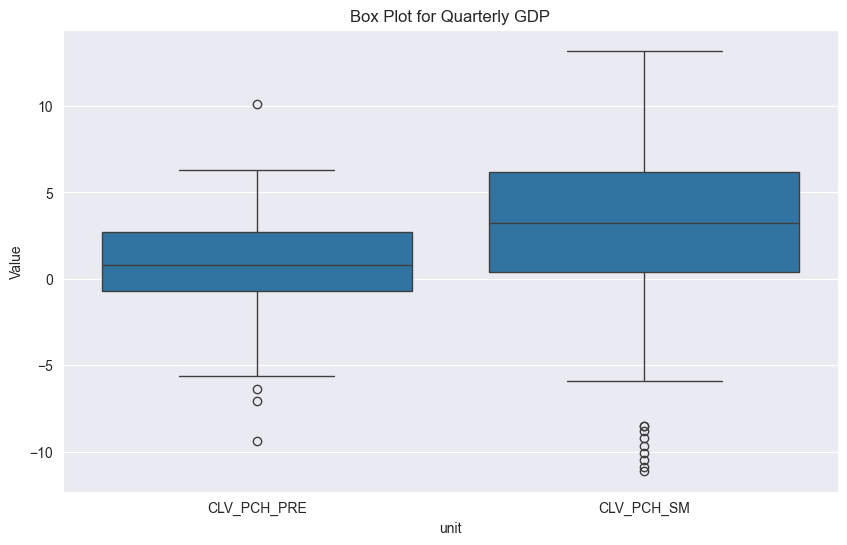

Outliers for Annual Household Disposable Income:


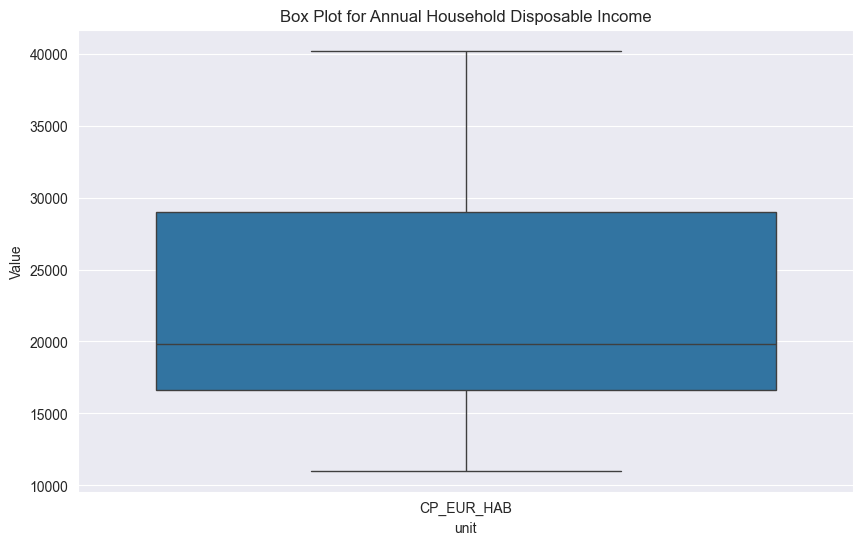

Outliers for Annual GDP at Market Prices:


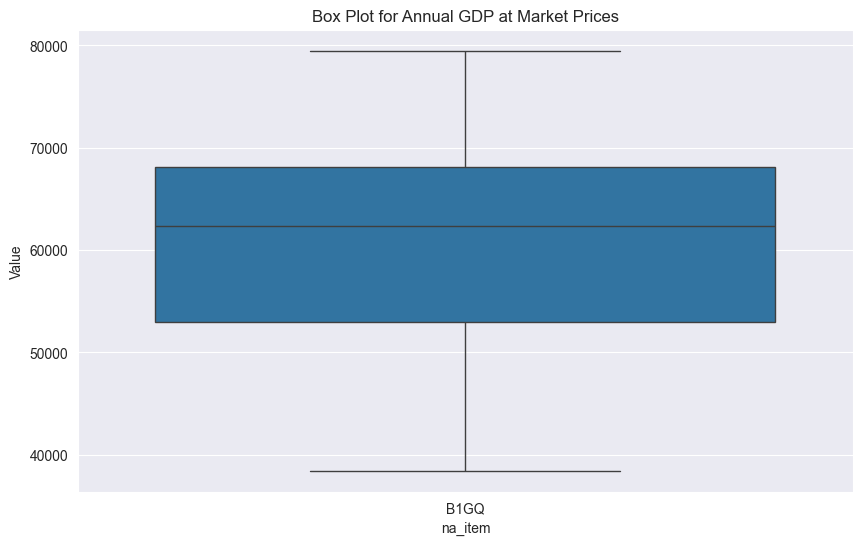

Outliers for Monthly Harmonized CPI:


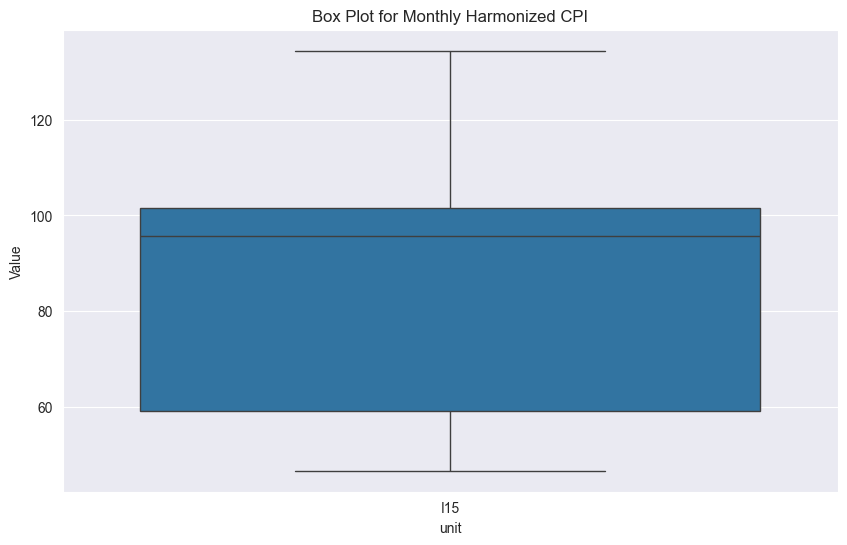

Outliers for Monthly CPI Inflation Rate:
  coicop:


,unit,coicop,TIME_PERIOD,value
278,RCH_A,TOT_X_NRG_FOOD,2008-08-01T00:00:00,13.0
280,RCH_A,TOT_X_NRG_FOOD,2008-09-01T00:00:00,13.5
282,RCH_A,TOT_X_NRG_FOOD,2008-10-01T00:00:00,16.4
284,RCH_A,TOT_X_NRG_FOOD,2008-11-01T00:00:00,18.1
286,RCH_A,TOT_X_NRG_FOOD,2008-12-01T00:00:00,20.4
288,RCH_A,TOT_X_NRG_FOOD,2009-01-01T00:00:00,21.2
290,RCH_A,TOT_X_NRG_FOOD,2009-02-01T00:00:00,21.5
292,RCH_A,TOT_X_NRG_FOOD,2009-03-01T00:00:00,20.3
294,RCH_A,TOT_X_NRG_FOOD,2009-04-01T00:00:00,16.9
296,RCH_A,TOT_X_NRG_FOOD,2009-05-01T00:00:00,16.6


  unit:


,unit,coicop,TIME_PERIOD,value
273,RCH_A,TOT_X_TBC,2008-05-01T00:00:00,11.9
275,RCH_A,TOT_X_TBC,2008-06-01T00:00:00,12.7
277,RCH_A,TOT_X_TBC,2008-07-01T00:00:00,13.8
278,RCH_A,TOT_X_NRG_FOOD,2008-08-01T00:00:00,13.0
279,RCH_A,TOT_X_TBC,2008-08-01T00:00:00,15.5
280,RCH_A,TOT_X_NRG_FOOD,2008-09-01T00:00:00,13.5
281,RCH_A,TOT_X_TBC,2008-09-01T00:00:00,15.6
282,RCH_A,TOT_X_NRG_FOOD,2008-10-01T00:00:00,16.4
283,RCH_A,TOT_X_TBC,2008-10-01T00:00:00,18.1
284,RCH_A,TOT_X_NRG_FOOD,2008-11-01T00:00:00,18.1


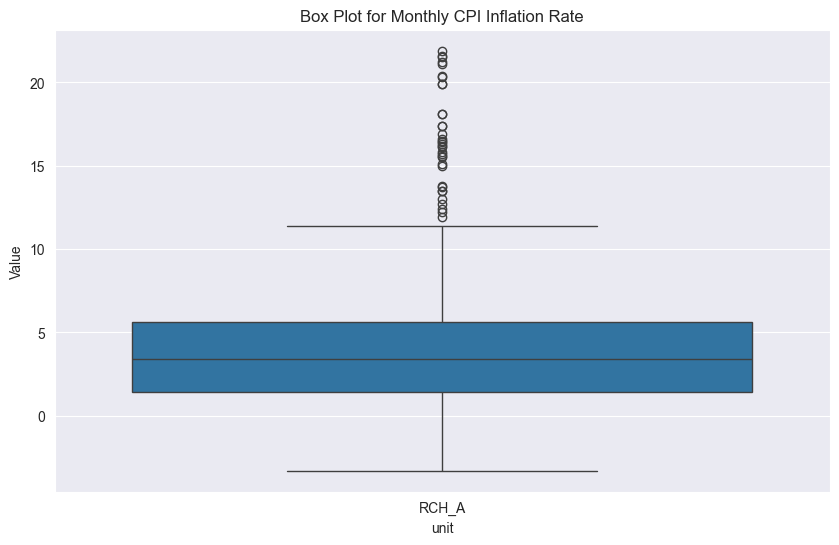

Outliers for Annual CPI Inflation Rate by Income Group:
  coicop:


,unit,coicop,TIME_PERIOD,value
46,rate,TOT_X_NRG_FOOD,2019-01-01T00:00:00,789.15
48,rate,TOT_X_NRG_FOOD,2020-01-01T00:00:00,798.43


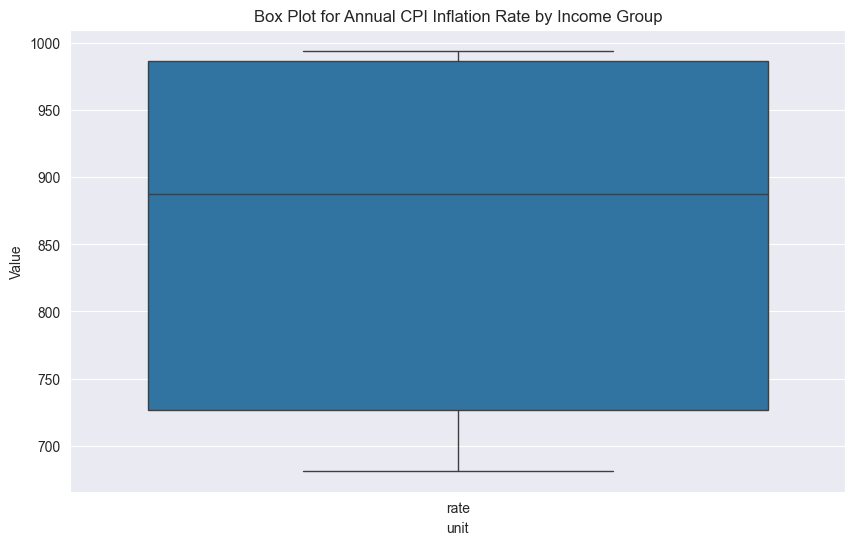

Outliers for Annual Unemployment Rate by Education Level:
  age:


,unit,sex,age,isced11,TIME_PERIOD,value
42,PC,T,Y25-64,ED0-2,2009-01-01T00:00:00,7.4
45,PC,T,Y25-64,ED0-2,2010-01-01T00:00:00,7.2
46,PC,T,Y25-64,ED3_4,2010-01-01T00:00:00,7.2
48,PC,T,Y25-64,ED0-2,2011-01-01T00:00:00,7.3
51,PC,T,Y25-64,ED0-2,2012-01-01T00:00:00,7.3
78,PC,T,Y25-64,ED0-2,2021-01-01T00:00:00,6.8


  sex:


,unit,sex,age,isced11,TIME_PERIOD,value
42,PC,T,Y25-64,ED0-2,2009-01-01T00:00:00,7.4
45,PC,T,Y25-64,ED0-2,2010-01-01T00:00:00,7.2
46,PC,T,Y25-64,ED3_4,2010-01-01T00:00:00,7.2
48,PC,T,Y25-64,ED0-2,2011-01-01T00:00:00,7.3
51,PC,T,Y25-64,ED0-2,2012-01-01T00:00:00,7.3
78,PC,T,Y25-64,ED0-2,2021-01-01T00:00:00,6.8


  unit:


,unit,sex,age,isced11,TIME_PERIOD,value
42,PC,T,Y25-64,ED0-2,2009-01-01T00:00:00,7.4
45,PC,T,Y25-64,ED0-2,2010-01-01T00:00:00,7.2
46,PC,T,Y25-64,ED3_4,2010-01-01T00:00:00,7.2
48,PC,T,Y25-64,ED0-2,2011-01-01T00:00:00,7.3
51,PC,T,Y25-64,ED0-2,2012-01-01T00:00:00,7.3
78,PC,T,Y25-64,ED0-2,2021-01-01T00:00:00,6.8


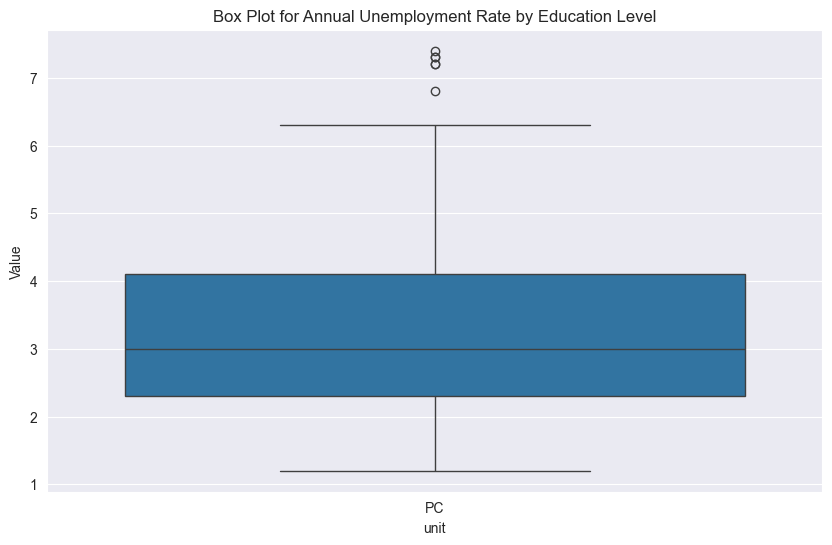

Outliers for Annual Employment Rate by Education Level:


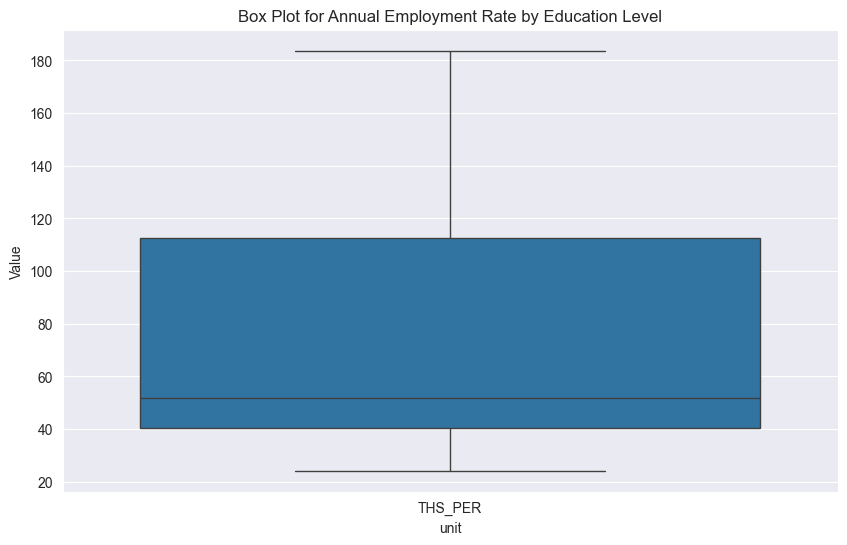

Outliers for Annual Employed Persons by Occupation and Educational Attainment Level:
  age:


,age,sex,isco08,isced11,unit,TIME_PERIOD,value
75,Y20-64,F,TOTAL,NRP,THS_PER,1995-01-01T00:00:00,58.7
76,Y20-64,F,TOTAL,TOTAL,THS_PER,1995-01-01T00:00:00,58.7
152,Y20-64,M,TOTAL,NRP,THS_PER,1995-01-01T00:00:00,66.0
153,Y20-64,M,TOTAL,TOTAL,THS_PER,1995-01-01T00:00:00,66.0
229,Y20-64,T,TOTAL,NRP,THS_PER,1995-01-01T00:00:00,124.7
...,...,...,...,...,...,...,...
11854,Y_GE15,T,OC5,TOTAL,THS_PER,2024-01-01T00:00:00,43.9
11875,Y_GE15,T,TOTAL,ED0-2,THS_PER,2024-01-01T00:00:00,44.7
11876,Y_GE15,T,TOTAL,ED3_4,THS_PER,2024-01-01T00:00:00,85.3
11877,Y_GE15,T,TOTAL,ED5-8,THS_PER,2024-01-01T00:00:00,96.4


  isced11:


,age,sex,isco08,isced11,unit,TIME_PERIOD,value
1654,Y20-64,F,TOTAL,ED0-2,THS_PER,1999-01-01T00:00:00,31.4
1731,Y20-64,M,TOTAL,ED0-2,THS_PER,1999-01-01T00:00:00,26.5
1773,Y20-64,T,OC5,ED0-2,THS_PER,1999-01-01T00:00:00,14.4
1808,Y20-64,T,TOTAL,ED0-2,THS_PER,1999-01-01T00:00:00,57.9
1840,Y_GE15,F,OC5,ED0-2,THS_PER,1999-01-01T00:00:00,15.0
...,...,...,...,...,...,...,...
11769,Y_GE15,F,TOTAL,TOTAL,THS_PER,2024-01-01T00:00:00,103.7
11824,Y_GE15,M,TOTAL,TOTAL,THS_PER,2024-01-01T00:00:00,125.8
11839,Y_GE15,T,OC2,TOTAL,THS_PER,2024-01-01T00:00:00,62.9
11854,Y_GE15,T,OC5,TOTAL,THS_PER,2024-01-01T00:00:00,43.9


  isco08:


,age,sex,isco08,isced11,unit,TIME_PERIOD,value
4120,Y20-64,T,NRP,TOTAL,THS_PER,2005-01-01T00:00:00,8.8
4305,Y_GE15,T,NRP,TOTAL,THS_PER,2005-01-01T00:00:00,10.1
6892,Y20-64,T,NRP,TOTAL,THS_PER,2012-01-01T00:00:00,7.6
7077,Y_GE15,T,NRP,TOTAL,THS_PER,2012-01-01T00:00:00,8.4
5102,Y_GE15,T,OC1,TOTAL,THS_PER,2007-01-01T00:00:00,16.4
...,...,...,...,...,...,...,...
11087,Y_GE15,T,TOTAL,TOTAL,THS_PER,2022-01-01T00:00:00,210.4
11318,Y20-64,T,TOTAL,TOTAL,THS_PER,2023-01-01T00:00:00,195.7
11483,Y_GE15,T,TOTAL,TOTAL,THS_PER,2023-01-01T00:00:00,220.3
11714,Y20-64,T,TOTAL,TOTAL,THS_PER,2024-01-01T00:00:00,204.0


  sex:


,age,sex,isco08,isced11,unit,TIME_PERIOD,value
75,Y20-64,F,TOTAL,NRP,THS_PER,1995-01-01T00:00:00,58.7
76,Y20-64,F,TOTAL,TOTAL,THS_PER,1995-01-01T00:00:00,58.7
284,Y_GE15,F,TOTAL,NRP,THS_PER,1995-01-01T00:00:00,65.6
285,Y_GE15,F,TOTAL,TOTAL,THS_PER,1995-01-01T00:00:00,65.6
471,Y20-64,F,TOTAL,NRP,THS_PER,1996-01-01T00:00:00,58.9
...,...,...,...,...,...,...,...
11854,Y_GE15,T,OC5,TOTAL,THS_PER,2024-01-01T00:00:00,43.9
11875,Y_GE15,T,TOTAL,ED0-2,THS_PER,2024-01-01T00:00:00,44.7
11876,Y_GE15,T,TOTAL,ED3_4,THS_PER,2024-01-01T00:00:00,85.3
11877,Y_GE15,T,TOTAL,ED5-8,THS_PER,2024-01-01T00:00:00,96.4


  unit:


,age,sex,isco08,isced11,unit,TIME_PERIOD,value
75,Y20-64,F,TOTAL,NRP,THS_PER,1995-01-01T00:00:00,58.7
76,Y20-64,F,TOTAL,TOTAL,THS_PER,1995-01-01T00:00:00,58.7
152,Y20-64,M,TOTAL,NRP,THS_PER,1995-01-01T00:00:00,66.0
153,Y20-64,M,TOTAL,TOTAL,THS_PER,1995-01-01T00:00:00,66.0
229,Y20-64,T,TOTAL,NRP,THS_PER,1995-01-01T00:00:00,124.7
...,...,...,...,...,...,...,...
11854,Y_GE15,T,OC5,TOTAL,THS_PER,2024-01-01T00:00:00,43.9
11875,Y_GE15,T,TOTAL,ED0-2,THS_PER,2024-01-01T00:00:00,44.7
11876,Y_GE15,T,TOTAL,ED3_4,THS_PER,2024-01-01T00:00:00,85.3
11877,Y_GE15,T,TOTAL,ED5-8,THS_PER,2024-01-01T00:00:00,96.4


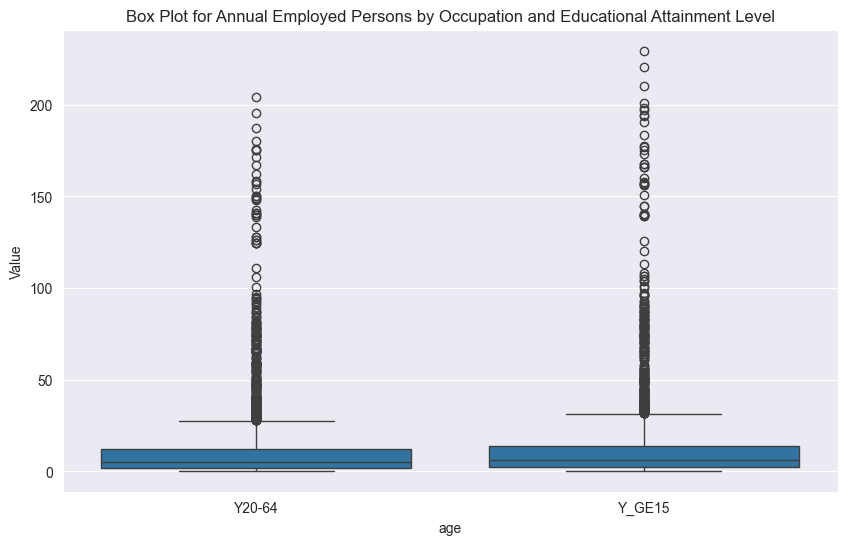

Outliers for Annual Employment:


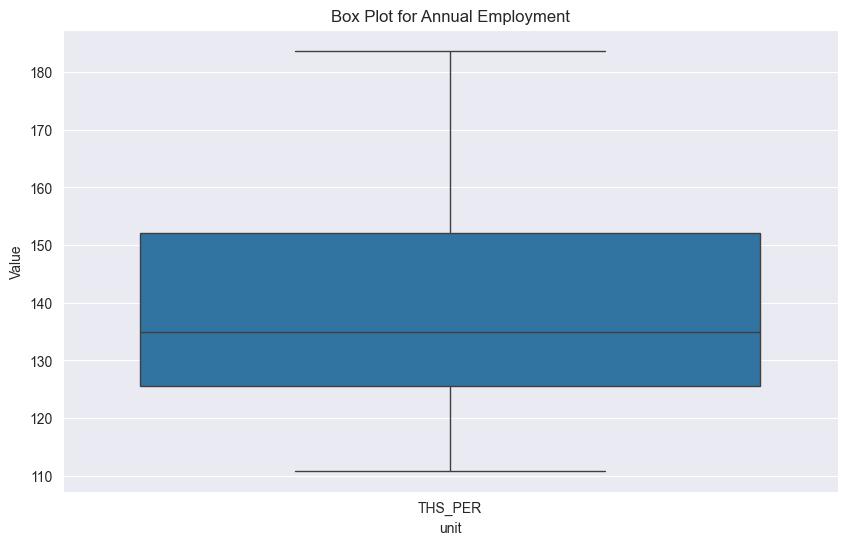

Outliers for Quarterly employment and activity by sex and age:
  age:


,indic_em,s_adj,sex,age,unit,TIME_PERIOD,value
33,ACT,NSA,T,Y15-64,THS_PER,2009-01-01T00:00:00,170.0
75,ACT,SA,T,Y15-64,THS_PER,2009-01-01T00:00:00,173.0
117,ACT,TC,T,Y15-64,THS_PER,2009-01-01T00:00:00,172.0
159,EMP_LFS,NSA,T,Y15-64,THS_PER,2009-01-01T00:00:00,158.0
201,EMP_LFS,SA,T,Y15-64,THS_PER,2009-01-01T00:00:00,161.0
...,...,...,...,...,...,...,...
16461,ACT,SA,T,Y25-54,THS_PER,2025-04-01T00:00:00,151.0
16503,ACT,TC,T,Y25-54,THS_PER,2025-04-01T00:00:00,151.0
16545,EMP_LFS,NSA,T,Y25-54,THS_PER,2025-04-01T00:00:00,146.0
16587,EMP_LFS,SA,T,Y25-54,THS_PER,2025-04-01T00:00:00,147.0


  indic_em:


,indic_em,s_adj,sex,age,unit,TIME_PERIOD,value
1,ACT,NSA,F,Y15-24,THS_PER,2009-01-01T00:00:00,13.0
3,ACT,NSA,F,Y15-29,THS_PER,2009-01-01T00:00:00,22.0
13,ACT,NSA,F,Y55-64,THS_PER,2009-01-01T00:00:00,12.0
15,ACT,NSA,M,Y15-24,THS_PER,2009-01-01T00:00:00,13.0
17,ACT,NSA,M,Y15-29,THS_PER,2009-01-01T00:00:00,23.0
...,...,...,...,...,...,...,...
16617,EMP_LFS,TC,M,Y55-64,THS_PER,2025-04-01T00:00:00,19.0
16623,EMP_LFS,TC,T,Y15-64,THS_PER,2025-04-01T00:00:00,216.0
16625,EMP_LFS,TC,T,Y15-74,THS_PER,2025-04-01T00:00:00,228.0
16627,EMP_LFS,TC,T,Y20-64,THS_PER,2025-04-01T00:00:00,201.0


  s_adj:


,indic_em,s_adj,sex,age,unit,TIME_PERIOD,value
1,ACT,NSA,F,Y15-24,THS_PER,2009-01-01T00:00:00,13.0
13,ACT,NSA,F,Y55-64,THS_PER,2009-01-01T00:00:00,12.0
15,ACT,NSA,M,Y15-24,THS_PER,2009-01-01T00:00:00,13.0
27,ACT,NSA,M,Y55-64,THS_PER,2009-01-01T00:00:00,15.0
33,ACT,NSA,T,Y15-64,THS_PER,2009-01-01T00:00:00,170.0
...,...,...,...,...,...,...,...
16617,EMP_LFS,TC,M,Y55-64,THS_PER,2025-04-01T00:00:00,19.0
16623,EMP_LFS,TC,T,Y15-64,THS_PER,2025-04-01T00:00:00,216.0
16625,EMP_LFS,TC,T,Y15-74,THS_PER,2025-04-01T00:00:00,228.0
16627,EMP_LFS,TC,T,Y20-64,THS_PER,2025-04-01T00:00:00,201.0


  sex:


,indic_em,s_adj,sex,age,unit,TIME_PERIOD,value
1,ACT,NSA,F,Y15-24,THS_PER,2009-01-01T00:00:00,13.0
13,ACT,NSA,F,Y55-64,THS_PER,2009-01-01T00:00:00,12.0
55,ACT,SA,F,Y55-64,THS_PER,2009-01-01T00:00:00,12.0
97,ACT,TC,F,Y55-64,THS_PER,2009-01-01T00:00:00,12.0
127,EMP_LFS,NSA,F,Y15-24,THS_PER,2009-01-01T00:00:00,12.0
...,...,...,...,...,...,...,...
16583,EMP_LFS,SA,T,Y15-74,THS_PER,2025-04-01T00:00:00,229.0
16585,EMP_LFS,SA,T,Y20-64,THS_PER,2025-04-01T00:00:00,204.0
16623,EMP_LFS,TC,T,Y15-64,THS_PER,2025-04-01T00:00:00,216.0
16625,EMP_LFS,TC,T,Y15-74,THS_PER,2025-04-01T00:00:00,228.0


  unit:


,indic_em,s_adj,sex,age,unit,TIME_PERIOD,value
126,EMP_LFS,NSA,F,Y15-24,PC_POP,2009-01-01T00:00:00,62.5
140,EMP_LFS,NSA,M,Y15-24,PC_POP,2009-01-01T00:00:00,53.7
142,EMP_LFS,NSA,M,Y15-29,PC_POP,2009-01-01T00:00:00,60.0
154,EMP_LFS,NSA,T,Y15-24,PC_POP,2009-01-01T00:00:00,58.0
156,EMP_LFS,NSA,T,Y15-29,PC_POP,2009-01-01T00:00:00,62.3
...,...,...,...,...,...,...,...
16539,EMP_LFS,NSA,T,Y15-64,THS_PER,2025-04-01T00:00:00,218.0
16541,EMP_LFS,NSA,T,Y15-74,THS_PER,2025-04-01T00:00:00,230.0
16581,EMP_LFS,SA,T,Y15-64,THS_PER,2025-04-01T00:00:00,217.0
16583,EMP_LFS,SA,T,Y15-74,THS_PER,2025-04-01T00:00:00,229.0


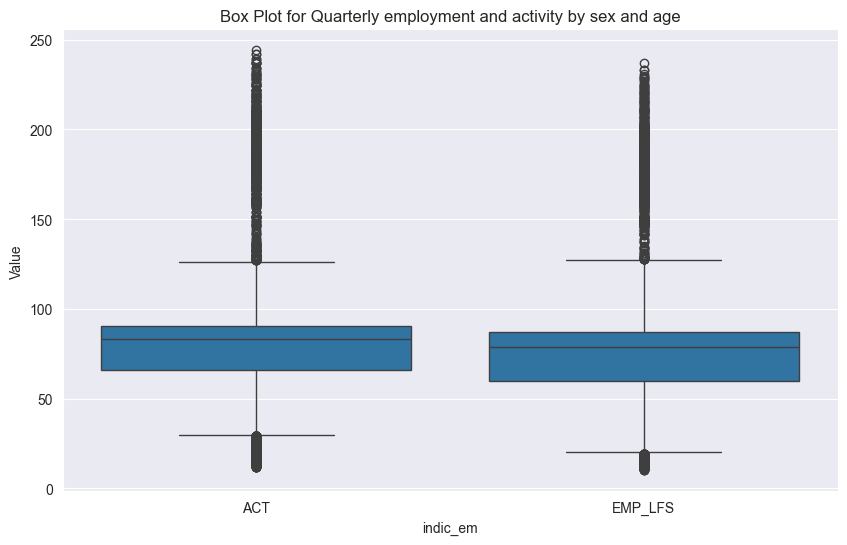

Outliers for Quarterly labour market transitions:
  indic_em:


,unit,s_adj,indic_em,sex,TIME_PERIOD,value
162,THS_PER,NSA,E_E,F,2010-04-01T00:00:00,74.0
163,THS_PER,NSA,E_E,M,2010-04-01T00:00:00,80.0
164,THS_PER,NSA,E_E,T,2010-04-01T00:00:00,154.0
189,THS_PER,SA,E_E,F,2010-04-01T00:00:00,74.0
190,THS_PER,SA,E_E,M,2010-04-01T00:00:00,80.0
...,...,...,...,...,...,...
934,PC_INAC,NSA,I_U,M,2011-04-01T00:00:00,15.4
2662,PC_INAC,NSA,I_U,M,2013-04-01T00:00:00,15.3
8710,PC_INAC,NSA,I_U,M,2020-04-01T00:00:00,15.2
9358,PC_INAC,NSA,I_U,M,2021-04-01T00:00:00,15.4


  s_adj:


,unit,s_adj,indic_em,sex,TIME_PERIOD,value
164,THS_PER,NSA,E_E,T,2010-04-01T00:00:00,154.0
380,THS_PER,NSA,E_E,T,2010-07-01T00:00:00,153.0
596,THS_PER,NSA,E_E,T,2010-10-01T00:00:00,154.0
812,THS_PER,NSA,E_E,T,2011-01-01T00:00:00,154.0
1028,THS_PER,NSA,E_E,T,2011-04-01T00:00:00,154.0
...,...,...,...,...,...,...
12772,PC_EMP,SA,E_E,M,2025-04-01T00:00:00,96.8
12773,PC_EMP,SA,E_E,T,2025-04-01T00:00:00,97.1
12933,THS_PER,SA,E_E,F,2025-04-01T00:00:00,101.0
12934,THS_PER,SA,E_E,M,2025-04-01T00:00:00,116.0


  sex:


,unit,s_adj,indic_em,sex,TIME_PERIOD,value
10963,THS_PER,NSA,E_E,M,2023-01-01T00:00:00,111.0
10990,THS_PER,SA,E_E,M,2023-01-01T00:00:00,111.0
11179,THS_PER,NSA,E_E,M,2023-04-01T00:00:00,113.0
11206,THS_PER,SA,E_E,M,2023-04-01T00:00:00,113.0
11395,THS_PER,NSA,E_E,M,2023-07-01T00:00:00,116.0
...,...,...,...,...,...,...
12503,THS_PER,SA,E_E,T,2024-10-01T00:00:00,220.0
12692,THS_PER,NSA,E_E,T,2025-01-01T00:00:00,214.0
12719,THS_PER,SA,E_E,T,2025-01-01T00:00:00,214.0
12908,THS_PER,NSA,E_E,T,2025-04-01T00:00:00,217.0


  unit:


,unit,s_adj,indic_em,sex,TIME_PERIOD,value
162,THS_PER,NSA,E_E,F,2010-04-01T00:00:00,74.0
163,THS_PER,NSA,E_E,M,2010-04-01T00:00:00,80.0
164,THS_PER,NSA,E_E,T,2010-04-01T00:00:00,154.0
189,THS_PER,SA,E_E,F,2010-04-01T00:00:00,74.0
190,THS_PER,SA,E_E,M,2010-04-01T00:00:00,80.0
...,...,...,...,...,...,...
12920,THS_PER,NSA,I_I,T,2025-04-01T00:00:00,45.0
12933,THS_PER,SA,E_E,F,2025-04-01T00:00:00,101.0
12934,THS_PER,SA,E_E,M,2025-04-01T00:00:00,116.0
12935,THS_PER,SA,E_E,T,2025-04-01T00:00:00,217.0


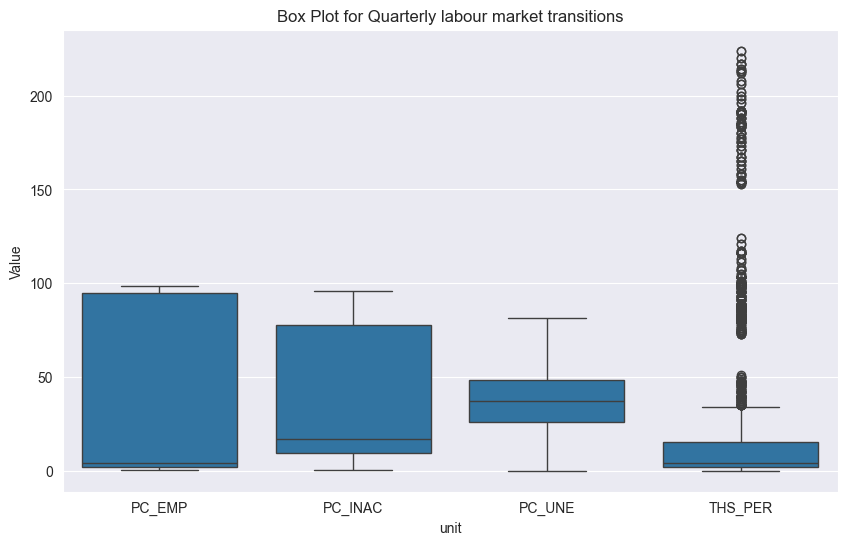

Outliers for Quarterly employment rates by citizenship:
  age:


,unit,sex,age,citizen,TIME_PERIOD,value
50659,PC,M,Y15-19,NAT,2021-01-01T00:00:00,33.2
2404,PC,T,Y15-24,FOR,2001-04-01T00:00:00,96.6
17037,PC,F,Y15-24,FOR,2008-04-01T00:00:00,93.4
17468,PC,T,Y15-24,EU27_2020_FOR,2008-04-01T00:00:00,94.8
17469,PC,T,Y15-24,FOR,2008-04-01T00:00:00,95.3
...,...,...,...,...,...,...
57399,PC,M,Y_GE50,EU27_2020_FOR,2023-07-01T00:00:00,91.6
58712,PC,M,Y_GE50,NEU27_2020_FOR,2024-01-01T00:00:00,92.7
59812,PC,F,Y_GE50,NAT,2024-07-01T00:00:00,46.3
60470,PC,F,Y_GE50,TOTAL,2024-10-01T00:00:00,46.0


  citizen:


,unit,sex,age,citizen,TIME_PERIOD,value
15753,PC,F,Y15-74,EU27_2020_FOR,2007-10-01T00:00:00,64.4
15807,PC,F,Y25-74,EU27_2020_FOR,2007-10-01T00:00:00,62.6
15911,PC,F,Y_GE15,EU27_2020_FOR,2007-10-01T00:00:00,64.4
15918,PC,F,Y_GE25,EU27_2020_FOR,2007-10-01T00:00:00,62.6
19884,PC,M,Y15-39,EU27_2020_FOR,2009-04-01T00:00:00,63.8
...,...,...,...,...,...,...
62180,PC,T,Y65-69,TOTAL,2025-04-01T00:00:00,50.2
62186,PC,T,Y65-74,TOTAL,2025-04-01T00:00:00,34.3
62192,PC,T,Y70-74,TOTAL,2025-04-01T00:00:00,14.9
62218,PC,T,Y_GE65,TOTAL,2025-04-01T00:00:00,23.5


  sex:


,unit,sex,age,citizen,TIME_PERIOD,value
175,PC,F,Y65-69,NAT,1998-04-01T00:00:00,44.0
178,PC,F,Y65-69,TOTAL,1998-04-01T00:00:00,43.0
181,PC,F,Y65-74,NAT,1998-04-01T00:00:00,27.5
184,PC,F,Y65-74,TOTAL,1998-04-01T00:00:00,27.2
213,PC,F,Y_GE65,NAT,1998-04-01T00:00:00,27.5
...,...,...,...,...,...,...
62212,PC,T,Y_GE50,TOTAL,2025-04-01T00:00:00,55.3
62215,PC,T,Y_GE65,NAT,2025-04-01T00:00:00,23.3
62218,PC,T,Y_GE65,TOTAL,2025-04-01T00:00:00,23.5
62221,PC,T,Y_GE75,NAT,2025-04-01T00:00:00,7.8


  unit:


,unit,sex,age,citizen,TIME_PERIOD,value
175,PC,F,Y65-69,NAT,1998-04-01T00:00:00,44.0
178,PC,F,Y65-69,TOTAL,1998-04-01T00:00:00,43.0
181,PC,F,Y65-74,NAT,1998-04-01T00:00:00,27.5
184,PC,F,Y65-74,TOTAL,1998-04-01T00:00:00,27.2
213,PC,F,Y_GE65,NAT,1998-04-01T00:00:00,27.5
...,...,...,...,...,...,...
62212,PC,T,Y_GE50,TOTAL,2025-04-01T00:00:00,55.3
62215,PC,T,Y_GE65,NAT,2025-04-01T00:00:00,23.3
62218,PC,T,Y_GE65,TOTAL,2025-04-01T00:00:00,23.5
62221,PC,T,Y_GE75,NAT,2025-04-01T00:00:00,7.8


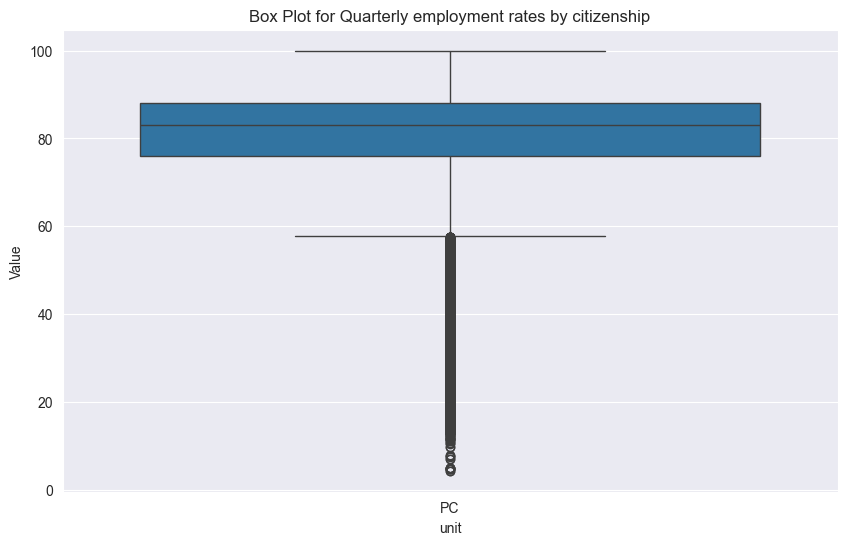

Outliers for Monthly total unemployment rate:


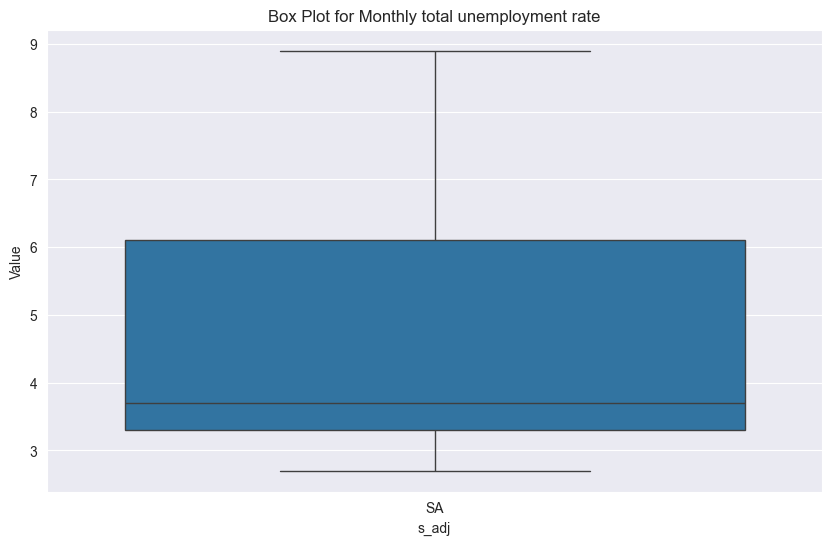

Outliers for Annual population by educational attainment level:


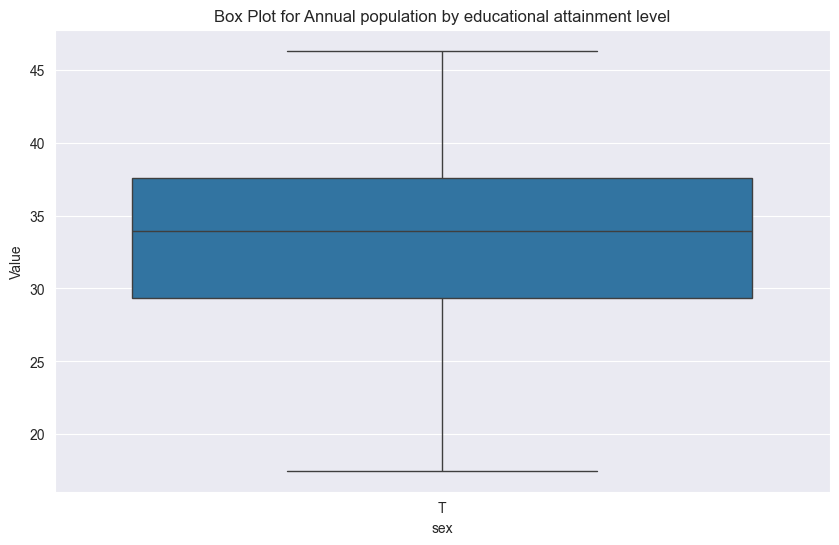

Outliers for Annual net earnings:


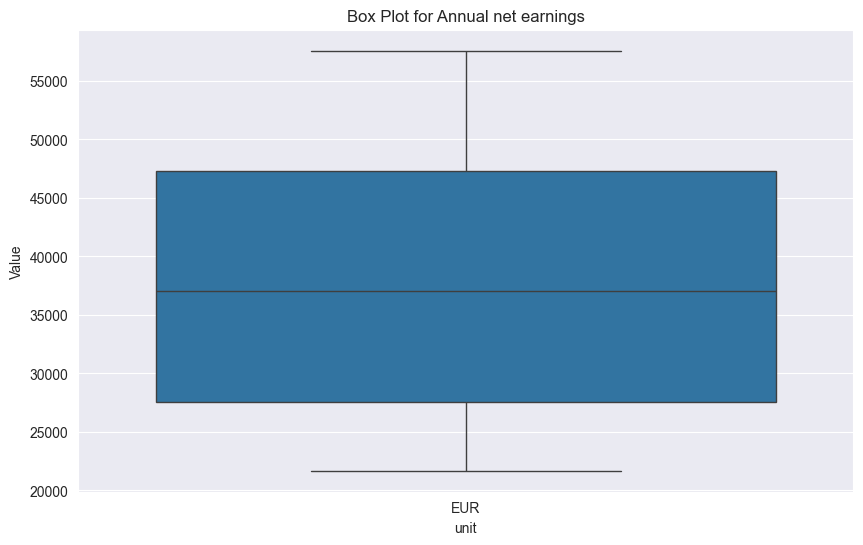

Outliers for Annual gender pay gap in unadjusted form:
  nace_r2:


,unit,nace_r2,TIME_PERIOD,value
0,PC,B-S,2007-01-01T00:00:00,23.4


  unit:


,unit,nace_r2,TIME_PERIOD,value
0,PC,B-S,2007-01-01T00:00:00,23.4


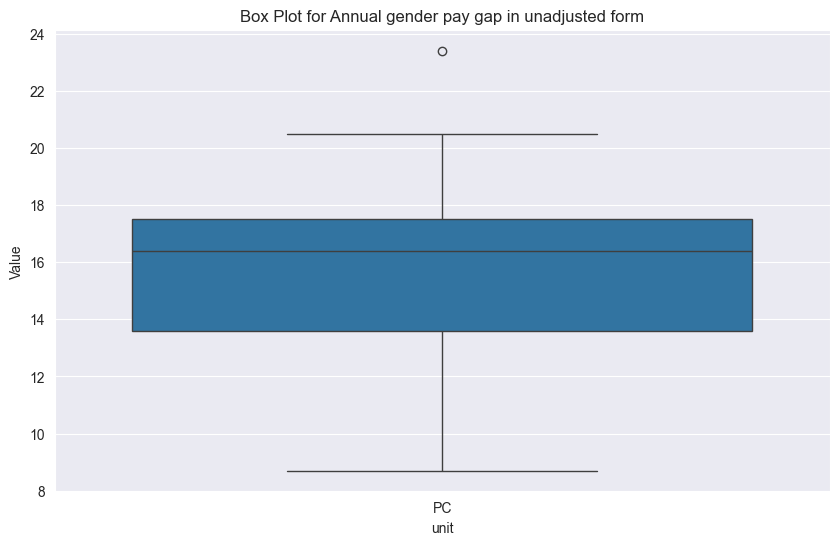

In [61]:
for frame in DATAFRAMES:
    print(f"Outliers for {frame.name}:")
    outliers = get_outliers(frame)
    for key, outlier_df in outliers.items():
        if not outlier_df.empty:
            print(f"  {key}:")
            display(outlier_df)
    box_plot(frame)

